In [1]:
# Dependencies
import tweepy
import json
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = 'NifRehCGUHRSUFBk0vv0Vjing'
consumer_secret = 'DnviBCITMk7LgBQYCqoHafODESCC6rBOcJp9ZdpCLwhWgfKFUz'
access_token = '979169820619849728-tSWnLhGzAoWLHnlTNezh3LV94TIeWBy'
access_token_secret = 'kHoW9NPeMBTE0KY8P3aA1BcIXzU6oYL6qLPK9EI5Uzr7t'

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN",
                "@FoxNews", "@nytimes")

In [5]:
# List to hold results
results_list = []


# Loop through all target users
for target in target_terms:

    
    
    # Lists to hold sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    source_list = []
    text_list = []
    date_list = []
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1,6):

       # Get all tweets from home feed
        public_tweets = api.user_timeline(target, page=x)
       
        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Get the specific column data
            tweet_source = tweet["user"]['name']
            tweet_text = tweet['text']
            tweet_date = tweet['created_at']
            
            #Convert Time
            c_time = datetime.strptime(tweet_date, "%a %b %d %H:%M:%S %z %Y")
            converted_time = c_time.strftime('%Y %m %d')
            
            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            source_list.append(tweet_source)
            text_list.append(tweet_text)
            date_list.append(converted_time)
            
        
        
    # Store Values into List
    news_list = {
        "News Organization": source_list,
        "Tweet's Text": text_list,
        "Date": date_list,
        "Compound Score": compound_list,
        "Positive Score": positive_list,
        'Negative Score': negative_list,
        'Neutral Score': neutral_list}
   
    
    print(news_list)
  
    results_list.append(news_list)
   
    

{'News Organization': ['BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC'], "Tweet's Text": ['🐶❤️😽\nHenry and Baloo: Dog and cat travel companions gain cult following.\n👉 https://t.co/rTpxqa69Oq https://t.co/iRkQXMwnyv', "A new campaign is encouraging people to do CPR to the tune of @The_Proclaimers' hit 'I'm Gonna Be (500 miles)'.\n👉… https://t.co/M

{'News Organization': ['CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS'], "Tweet's Text": ['Which state does @reba call home and which song was her first No. 1 single? Test your knowledge of the beloved coun… https://t.co/Sp8icKpFNu', 'This just in! Thirteen-time ACM Award® winner @carrieunderwood will be performing her soon-to-be-released single l

{'News Organization': ['CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN'], "Tweet's Text": ['What cities and states are doing about guns since the Parkland shooting https://t.co/vngGcWVQF7 https://t.co/9chaUhwhAl', 'The FDA worried this drug was risky. Now doctors are concerned about the report of more than 700 deaths in the less… https://t.co/esK5Q

{'News Organization': ['Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox 

{'News Organization': ['The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New York Times', 'The New 

In [6]:
news_df = pd.DataFrame(results_list)

news_df

,Compound Score,Date,Negative Score,Neutral Score,News Organization,Positive Score,Tweet's Text
0,"[0.5267, 0.5267, 0.4404, 0.0, 0.0, 0.34, 0.670...","[2018 04 09, 2018 04 09, 2018 04 09, 2018 04 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.793, 0.855, 0.707, 1.0, 1.0, 0.888, 0.792, ...","[BBC, BBC, BBC, BBC, BBC, BBC, BBC, BBC, BBC, ...","[0.207, 0.145, 0.293, 0.0, 0.0, 0.112, 0.208, ...",[🐶❤️😽\nHenry and Baloo: Dog and cat travel com...
1,"[0.2732, 0.6239, 0.6467, 0.7096, 0.5562, 0.419...","[2018 04 09, 2018 04 09, 2018 04 09, 2018 04 0...","[0.086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.784, 0.786, 0.72, 0.742, 0.854, 0.892, 0.81...","[CBS, CBS, CBS, CBS, CBS, CBS, CBS, CBS, CBS, ...","[0.129, 0.214, 0.28, 0.258, 0.146, 0.108, 0.18...",[Which state does @reba call home and which so...
2,"[0.0, -0.4588, 0.6808, -0.6597, 0.6808, -0.190...","[2018 04 09, 2018 04 09, 2018 04 09, 2018 04 0...","[0.0, 0.16, 0.0, 0.252, 0.0, 0.077, 0.153, 0.0...","[1.0, 0.84, 0.781, 0.748, 0.781, 0.923, 0.847,...","[CNN, CNN, CNN, CNN, CNN, CNN, CNN, CNN, CNN, ...","[0.0, 0.0, 0.219, 0.0, 0.219, 0.0, 0.0, 0.0, 0...",[What cities and states are doing about guns s...
3,"[0.128, -0.296, 0.0, 0.0, 0.3182, 0.0, -0.5574...","[2018 04 09, 2018 04 09, 2018 04 09, 2018 04 0...","[0.0, 0.145, 0.0, 0.0, 0.0, 0.0, 0.231, 0.0, 0...","[0.88, 0.855, 1.0, 1.0, 0.874, 1.0, 0.769, 1.0...","[Fox News, Fox News, Fox News, Fox News, Fox N...","[0.12, 0.0, 0.0, 0.0, 0.126, 0.0, 0.0, 0.0, 0....",['Shirtless' daredevil draped in American flag...
4,"[-0.2263, 0.1027, 0.6705, 0.1027, 0.5598, -0.2...","[2018 04 09, 2018 04 09, 2018 04 09, 2018 04 0...","[0.101, 0.073, 0.0, 0.086, 0.0, 0.128, 0.0, 0....","[0.899, 0.833, 0.683, 0.811, 0.833, 0.872, 1.0...","[The New York Times, The New York Times, The N...","[0.0, 0.094, 0.317, 0.104, 0.167, 0.0, 0.0, 0....",[Gov. Rick Scott made official what Floridians...


In [7]:
s1 = news_df['Date'].apply(pd.Series, 1).stack()
s1.index = s1.index.droplevel(-1)
s1.name = 'Date'

s2 = news_df['News Organization'].apply(pd.Series, 1).stack()
s2.index = s2.index.droplevel(-1)
s2.name = 'News Organization'

s3 = news_df["Tweet's Text"].apply(pd.Series, 1).stack()
s3.index = s3.index.droplevel(-1)
s3.name = "Tweet's Text"

s4 = news_df['Compound Score'].apply(pd.Series, 1).stack()
s4.index = s4.index.droplevel(-1)
s4.name = 'Compound Score'

s5 = news_df['Positive Score'].apply(pd.Series, 1).stack()
s5.index = s5.index.droplevel(-1)
s5.name = 'Positive Score'

s6 = news_df['Neutral Score'].apply(pd.Series, 1).stack()
s6.index = s6.index.droplevel(-1)
s6.name = 'Neutral Score'

s7 = news_df['Negative Score'].apply(pd.Series, 1).stack()
s7.index = s7.index.droplevel(-1)
s7.name = 'Negative Score'


clean_df = pd.concat([s1, s2, s3, s4, s5, s6, s7], axis=1).reset_index(drop=True)


clean_df


,Date,News Organization,Tweet's Text,Compound Score,Positive Score,Neutral Score,Negative Score
0,2018 04 09,BBC,🐶❤️😽\nHenry and Baloo: Dog and cat travel comp...,0.5267,0.207,0.793,0.000
1,2018 04 09,BBC,A new campaign is encouraging people to do CPR...,0.5267,0.145,0.855,0.000
2,2018 04 09,BBC,How NOT to impress Madonna...\n#TheGrahamNorto...,0.4404,0.293,0.707,0.000
3,2018 04 09,BBC,RT @bbccomedy: Philomena Cunk steps on board t...,0.0000,0.000,1.000,0.000
4,2018 04 09,BBC,"🌭🐶 Over 1,500 people turned up to this mass sa...",0.0000,0.000,1.000,0.000
5,2018 04 09,BBC,RT @bbcsoutheast: You don't have to be married...,0.3400,0.112,0.888,0.000
6,2018 04 09,BBC,"RT @BBCnireland: As the days get longer, here ...",0.6705,0.208,0.792,0.000
7,2018 04 09,BBC,Flipping the script on dyslexia. https://t.co/...,0.0000,0.000,1.000,0.000
8,2018 04 09,BBC,RT @bbcthesocial: This is how homophobia feels...,0.0000,0.000,1.000,0.000
9,2018 04 09,BBC,RT @BBCFOUR: How do you cope with stage fright...,-0.2023,0.068,0.833,0.098


In [8]:
clean_df.assign(Count='')
clean_df['Count'] = clean_df.groupby('News Organization').cumcount() + 1
clean_df

,Date,News Organization,Tweet's Text,Compound Score,Positive Score,Neutral Score,Negative Score,Count
0,2018 04 09,BBC,🐶❤️😽\nHenry and Baloo: Dog and cat travel comp...,0.5267,0.207,0.793,0.000,1
1,2018 04 09,BBC,A new campaign is encouraging people to do CPR...,0.5267,0.145,0.855,0.000,2
2,2018 04 09,BBC,How NOT to impress Madonna...\n#TheGrahamNorto...,0.4404,0.293,0.707,0.000,3
3,2018 04 09,BBC,RT @bbccomedy: Philomena Cunk steps on board t...,0.0000,0.000,1.000,0.000,4
4,2018 04 09,BBC,"🌭🐶 Over 1,500 people turned up to this mass sa...",0.0000,0.000,1.000,0.000,5
5,2018 04 09,BBC,RT @bbcsoutheast: You don't have to be married...,0.3400,0.112,0.888,0.000,6
6,2018 04 09,BBC,"RT @BBCnireland: As the days get longer, here ...",0.6705,0.208,0.792,0.000,7
7,2018 04 09,BBC,Flipping the script on dyslexia. https://t.co/...,0.0000,0.000,1.000,0.000,8
8,2018 04 09,BBC,RT @bbcthesocial: This is how homophobia feels...,0.0000,0.000,1.000,0.000,9
9,2018 04 09,BBC,RT @BBCFOUR: How do you cope with stage fright...,-0.2023,0.068,0.833,0.098,10


In [9]:
# Export file as a CSV
clean_df.to_csv("Output/Output.csv", index=False, header=True)

In [10]:
bbc = clean_df[clean_df['News Organization']=='BBC']
cbs = clean_df[clean_df['News Organization']=='CBS']
cnn = clean_df[clean_df['News Organization']=='CNN']
fox = clean_df[clean_df['News Organization']=='FOX']
nyt = clean_df[clean_df['News Organization']=='The New York Times']

bbc_tweet = bbc['Count']
bbc_pol = bbc['Compound Score']
cbs_tweet = cbs['Count']
cbs_pol = cbs['Compound Score']
cnn_tweet = cnn['Count']
cnn_pol = cnn['Compound Score']
fox_tweet = fox['Count']
fox_pol = fox['Compound Score']
nyt_tweet = nyt['Count']
nyt_pol = nyt['Compound Score']


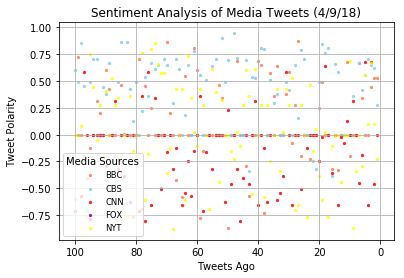

In [11]:
plt.scatter(bbc_tweet, 
            bbc_pol, 
            s=5, c="coral", linewidths=1, marker="o", 
            alpha=0.8, label="BBC")
plt.scatter(cbs_tweet, 
            cbs_pol, 
            s=5, c="skyblue", linewidths=1, marker="o", 
            alpha=0.8, label="CBS")
plt.scatter(cnn_tweet, 
            cnn_pol, 
            s=5, c="red", linewidths=1, marker="o", 
            alpha=0.8, label="CNN")
plt.scatter(fox_tweet, 
            fox_pol, 
            s=5, c="purple", linewidths=1, marker="o", 
            alpha=0.8, label="FOX")
plt.scatter(nyt_tweet, 
            nyt_pol, 
            s=5, c="yellow", linewidths=1, marker="o", 
            alpha=0.8, label="NYT")

plt.title('Sentiment Analysis of Media Tweets (4/9/18)')
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')
plt.gca().invert_xaxis()
plt.grid(True)


lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Media Sources", 
                  labelspacing=0.5)


plt.savefig('Output/Sentiment_Scatter.png')
plt.show()

In [37]:
sent_avg = clean_df.groupby(['News Organization']).mean()['Compound Score']
df = pd.DataFrame(sent_avg)
print(sent_avg)

News Organization
BBC                   0.088586
CBS                   0.363949
CNN                  -0.146902
Fox News             -0.106328
The New York Times    0.030878
Name: Compound Score, dtype: float64


[array([ 0.089,  0.364, -0.147, -0.106,  0.031])]


TypeError: unsupported format string passed to method.__format__

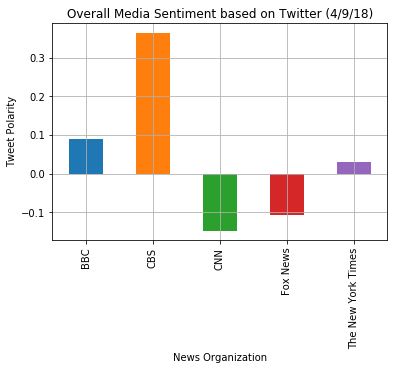

In [52]:
labels = [df['Compound Score'].values.round(3)]
print(labels)
news_chart = sent_avg.plot(kind='bar')
news_chart.set_title('Overall Media Sentiment based on Twitter (4/9/18)')
news_chart.set_ylabel("Tweet Polarity")
plt.grid(True)


rects = news_chart.patches


for rect, label in zip(rects, labels):
    y_value = rect.get_height
    x_value = rect.get_x() + rect.get_width()/2
    space = 5
    va = 'bottom'
   
        
    label = "{:.3f}".format(y_value)
    plt.annotate(label, 
                 (x_value,y_value),
                xytext=(0, space),
                textcoords='offset points',
                ha='center',
                va=va)


plt.savefig('Output/Sentiment_Bar.png')
plt.show()